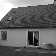

In [115]:
from IPython.display import display,Image

display(Image(filename="/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302//images/image1.jpg"))

In [116]:
import os
import numpy as np
from scipy import ndimage


image_size = 56  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_img(folder):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      #if image_data.shape != (image_size, image_size):
        #raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

In [117]:
example_path = "/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images/"

load_img(example_path)

/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images/
('Full dataset tensor:', (3, 56, 56))
('Mean:', -0.040738795)
('Standard deviation:', 0.2177446)


array([[[ 0.49607843,  0.48039216,  0.48431373, ...,  0.30392158,
         -0.35490197, -0.30784315],
        [ 0.48823529,  0.48039216,  0.46862745, ...,  0.2647059 ,
         -0.06470589, -0.02156863],
        [ 0.48823529,  0.48431373,  0.47254902, ...,  0.09215686,
         -0.09215686, -0.03333334],
        ..., 
        [-0.31568629, -0.28823531, -0.30392158, ..., -0.24901961,
         -0.24509804, -0.22941177],
        [-0.24509804, -0.30000001, -0.30392158, ..., -0.31568629,
         -0.31176472, -0.3392157 ],
        [-0.29607844, -0.28823531, -0.28039217, ..., -0.30392158,
         -0.33529413, -0.30784315]],

       [[ 0.36274511,  0.35882354,  0.34705883, ...,  0.46078432,
          0.46078432,  0.47254902],
        [ 0.34705883,  0.36666667,  0.34705883, ...,  0.44509804,
          0.44901961,  0.43725491],
        [ 0.42941177,  0.40196079,  0.39019608, ...,  0.44901961,
          0.44901961,  0.44901961],
        ..., 
        [-0.18627451, -0.23333333, -0.23333333, ...,

In [118]:
def maybe_pickle(data_folders, force=True):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_img(folder)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

In [119]:
def dirNames(path):
    dirNameList = []
    for f in os.listdir(path):
        child = os.path.join(path, f)
        if os.path.isdir(child):
            dirNameList.append(child)
    return dirNameList

def imgDir(func,path):
    imageDir = []
    for dirName in dirNames(path):
        imageDir.append(dirName + "/images")
    return imageDir

path_city = "/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/"
pathesList = imgDir(dirNames,path_city)



In [120]:
trainPath = pathesList[0:2]
trainPath

['/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images',
 '/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images']

In [121]:
maybe_pickle(trainPath)

Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images
('Full dataset tensor:', (3, 56, 56))
('Mean:', -0.040738795)
('Standard deviation:', 0.2177446)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images
('Full dataset tensor:', (1, 56, 56))
('Mean:', 0.058088239)
('Standard deviation:', 0.14656831)


['/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle',
 '/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle']

In [122]:
train_datasets = maybe_pickle(trainPath)

Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10002302/images
('Full dataset tensor:', (3, 56, 56))
('Mean:', -0.040738795)
('Standard deviation:', 0.2177446)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/10048894/images
('Full dataset tensor:', (1, 56, 56))
('Mean:', 0.058088239)
('Standard deviation:', 0.14656831)


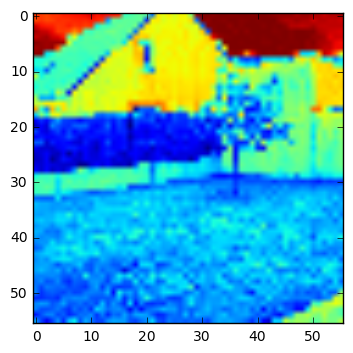

In [123]:
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt

pickle_file = train_datasets[0]  # index 0 should be all As, 1 = all Bs, etc.
with open(pickle_file, 'rb') as f:
    house_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(house_set))  # pick a random image index
    sample_image = house_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image) 
    plt.show()

In [124]:
# build the labels (price of properties)

import csv

path_csv_adverts = "/Users/alex/Documents/pythonProjects/opencvTraining/advertsInfo.csv" 

info_labels = []

with open(path_csv_adverts, 'rb') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
         info_labels.append(row)
            
info_labels = info_labels[1:len(info_labels)]
            
list_Adverts_Path = []
for path in pathesList :
    list_Adverts_Path.append(int(path.replace('/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/','').replace('/images','').replace('-','')))
 
#nb pictures
nbPictures_labels = [float(info_labels[i][1]) for i in range(len(info_labels))]

# surface house
surfaceHouse_labels = [float(info_labels[i][2]) for i in range(len(info_labels))]

# nb rooms
nbRooms_labels = [float(info_labels[i][3]) for i in range(len(info_labels))]

# surface land
surfaceLand_labels = [float(info_labels[i][4]) for i in range(len(info_labels))]

# price
price_labels = [float(info_labels[i][5]) for i in range(len(info_labels))]


print "nombre de repertoires avec images exploitable: " , len(list_Adverts_Path)
#int(float(info_labels[1][0]))
print "nombre de repertoires avec fichier json exploitable" , len(info_labels)


nombre de repertoires avec images exploitable:  654
nombre de repertoires avec fichier json exploitable 654


In [125]:
# construct de datasets

path_city = "/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/"
pathesList = imgDir(dirNames,path_city)

numberOfAdverts = len(pathesList)
print numberOfAdverts

#shuffle pathesList and price_labels 

index = list(range(len(pathesList)))
np.random.shuffle(index)

shuffled_pathesList = []
shuffled_price_labels = []
# added info
shuffled_nbPictures_labels = []
shuffled_surfaceHouse_labels = []
shuffled_surfaceLand_labels = []
shuffled_nbRooms_labels = []


for index_nb in index:
    shuffled_pathesList.append(pathesList[index_nb])    
    shuffled_price_labels.append(price_labels[index_nb]) 
    
    shuffled_nbPictures_labels.append(nbPictures_labels[index_nb]) 
    shuffled_surfaceHouse_labels.append(surfaceHouse_labels[index_nb]) 
    shuffled_surfaceLand_labels.append(surfaceLand_labels[index_nb]) 
    shuffled_nbRooms_labels.append(nbRooms_labels[index_nb]) 
    
    
    
# training set     
train_size = numberOfAdverts*70/100
trainPath = shuffled_pathesList[0:train_size]
train_datasets = maybe_pickle(trainPath)
train_prices = shuffled_price_labels[0:train_size]

train_nbPictures_labels = shuffled_nbPictures_labels[0:train_size]
train_surfaceHouse_labels = shuffled_surfaceHouse_labels[0:train_size]
train_surfaceLand_labels = shuffled_surfaceLand_labels[0:train_size]
train_nbRooms_labels = shuffled_nbRooms_labels[0:train_size]

# validation set
valid_size = numberOfAdverts - train_size
validPath = shuffled_pathesList[train_size:-1]
valid_datasets = maybe_pickle(validPath)
valid_prices = shuffled_price_labels[train_size:-1]

valid_nbPictures_labels = shuffled_nbPictures_labels[train_size:-1]
valid_surfaceHouse_labels = shuffled_surfaceHouse_labels[train_size:-1]
valid_surfaceLand_labels = shuffled_surfaceLand_labels[train_size:-1]
valid_nbRooms_labels = shuffled_nbRooms_labels[train_size:-1]

#path_csv_adverts = "/Users/alex/Documents/pythonProjects/opencvTraining/advertsInfo.csv" 

#adverts_info = csv.reader(path_csv_adverts)


654
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11472109/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11472109/images
('Full dataset tensor:', (1, 56, 56))
('Mean:', 0.057689328)
('Standard deviation:', 0.22345001)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11572915/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11572915/images
('Full dataset tensor:', (4, 56, 56))
('Mean:', 0.087131724)
('Standard deviation:', 0.1623452)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11605583/images.pickle.
/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11605583/images
('Full dataset tensor:', (10, 56, 56))
('Mean:', -0.082398206)
('Standard deviation:', 0.26413697)
Pickling /Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11159905-11159920/images.pickle.
/Use

In [126]:
train_datasets[0]

'/Users/alex/Documents/pythonProjects/opencvTraining/derivedImages/nantes/11472109/images.pickle'

In [127]:
# build generator to match images with prices
    
def images_variable_per_folder(pickle_file,price):
    
    with open(pickle_file, 'rb') as f:
        img_set = pickle.load(f)
    
    n = img_set.shape[0] 
    num = 0
    while num < n:
                
        yield img_set[num,:,:],price
        num += 1 
    

In [182]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    prices_labels = np.zeros((nb_rows,1))
    nbRooms_labels = np.zeros((nb_rows,1))
    surfaceHouse_labels = np.zeros((nb_rows,1))
    surfaceLand_labels = np.zeros((nb_rows,1))
    nbPictures_labels = np.zeros((nb_rows,1))    
  else:
    dataset, labels = None, None
  return dataset, prices_labels, nbRooms_labels, surfaceHouse_labels, surfaceLand_labels, nbPictures_labels

train_images_array , train_prices_array, train_nbRooms_array, train_surfaceHouse_array, train_surfaceLand_array, train_nbPictures_array = make_arrays(len(train_datasets),image_size)
valid_images_array , valid_prices_array, valid_nbRooms_array, valid_surfaceHouse_array, valid_surfaceLand_array, valid_nbPictures_array  = make_arrays(len(valid_datasets),image_size)


train_images_list = []
train_prices_list = []

train_nbRooms_list = []
train_surfaceHouse_list = []
train_surfaceLand_list = []
train_nbPictures_list = []

for i,pickle_file in enumerate(train_datasets):
      
    price = train_prices[i]
    
    nbRooms = train_nbRooms_labels[i]
    surfaceHouse = train_surfaceHouse_labels[i]
    surfaceLand = train_surfaceLand_labels[i]
    nbPictures = train_nbPictures_labels[i]
    
    images_price_generator = images_variable_per_folder(pickle_file,price)
     
    images_nbRooms_generator = images_variable_per_folder(pickle_file,nbRooms)
    images_surfaceHouse_generator = images_variable_per_folder(pickle_file,surfaceHouse)
    images_surfaceLand_generator = images_variable_per_folder(pickle_file,surfaceLand)
    images_nbPictures_generator = images_variable_per_folder(pickle_file,nbPictures)
    
    tuples_list_price = [tuple_images_price for tuple_images_price in images_price_generator]
    
    tuples_list_nbRooms = [tuple_images_nbRooms for tuple_images_nbRooms in images_nbRooms_generator]
    tuples_list_surfaceHouse = [tuple_images_surfaceHouse for tuple_images_surfaceHouse in images_surfaceHouse_generator]
    tuples_list_surfaceLand = [tuple_images_surfaceLand for tuple_images_surfaceLand in images_surfaceLand_generator]
    tuples_list_nbPictures = [tuple_images_nbPictures for tuple_images_nbPictures in images_nbPictures_generator]
    
    
    images_list = [x[0] for x in tuples_list_price]    
    price_list = [x[1] for x in tuples_list_price]   
    
    nbRooms_list = [x[1] for x in tuples_list_nbRooms]
    surfaceHouse_list = [x[1] for x in tuples_list_surfaceHouse]
    surfaceLand_list = [x[1] for x in tuples_list_surfaceLand]
    nbPictures_list = [x[1] for x in tuples_list_nbPictures]
    
    
    train_images_list.append(images_list) 
    train_prices_list.append(price_list)
    
    train_nbRooms_list.append(nbRooms_list)
    train_surfaceHouse_list.append(surfaceHouse_list)
    train_surfaceLand_list.append(surfaceLand_list)
    train_nbPictures_list.append(nbPictures_list)
    
    
valid_images_list = []
valid_prices_list = []

valid_nbRooms_list = []
valid_surfaceHouse_list = []
valid_surfaceLand_list = []
valid_nbPictures_list = []


for i,pickle_file in enumerate(valid_datasets):
      
    price = valid_prices[i]
    
    nbRooms = valid_nbRooms_labels[i]
    surfaceHouse = valid_surfaceHouse_labels[i]
    surfaceLand = valid_surfaceLand_labels[i]
    nbPictures = valid_nbPictures_labels[i]
    
    images_price_generator = images_variable_per_folder(pickle_file,price)
    
    images_nbRooms_generator = images_variable_per_folder(pickle_file,nbRooms)
    images_surfaceHouse_generator = images_variable_per_folder(pickle_file,surfaceHouse)
    images_surfaceLand_generator = images_variable_per_folder(pickle_file,surfaceLand)
    images_nbPictures_generator = images_variable_per_folder(pickle_file,nbPictures)
    
    tuples_list_price = [tuple_images_price for tuple_images_price in images_price_generator]
    
    tuples_list_nbRooms = [tuple_images_nbRooms for tuple_images_nbRooms in images_nbRooms_generator]
    tuples_list_surfaceHouse = [tuple_images_surfaceHouse for tuple_images_surfaceHouse in images_surfaceHouse_generator]
    tuples_list_surfaceLand = [tuple_images_surfaceLand for tuple_images_surfaceLand in images_surfaceLand_generator]
    tuples_list_nbPictures = [tuple_images_nbPictures for tuple_images_nbPictures in images_nbPictures_generator]    
    
    images_list = [x[0] for x in tuples_list_price]    
    price_list = [x[1] for x in tuples_list_price] 
    
    nbRooms_list = [x[1] for x in tuples_list_nbRooms]
    surfaceHouse_list = [x[1] for x in tuples_list_surfaceHouse]
    surfaceLand_list = [x[1] for x in tuples_list_surfaceLand]
    nbPictures_list = [x[1] for x in tuples_list_nbPictures]
    
    
    valid_images_list.append(images_list)
    valid_prices_list.append(price_list)
    
    valid_nbRooms_list.append(nbRooms_list)
    valid_surfaceHouse_list.append(surfaceHouse_list)
    valid_surfaceLand_list.append(surfaceLand_list)
    valid_nbPictures_list.append(nbPictures_list)
    
     

In [183]:
train_prices_array

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [184]:
# convertion in ndarrays

for i,train_price in enumerate(train_prices_list):
    train_prices_array[i][0] = train_price[0]
    
for j,row in enumerate(train_nbRooms_list):
    train_nbRooms_array[j][0] = row[0]

for k,row in enumerate(train_surfaceHouse_list):
    train_surfaceHouse_array[k][0] = row[0]

for l,row in enumerate(train_surfaceLand_list):
    train_surfaceLand_array[l][0] = row[0]
    
for m,row in enumerate(train_nbPictures_list):
    train_nbPictures_array[m][0] = row[0]
    
    
for i,row in enumerate(train_images_list):
    for image in row:
        train_images_array[i,:,:] = image
        
        
for i,row in enumerate(valid_prices_list):
    valid_prices_array[i][0] = row[0]
    
    
for i,row in enumerate(valid_nbRooms_list):
    valid_nbRooms_array[i][0] = row[0]    
    
for i,row in enumerate(valid_surfaceHouse_list):
    valid_surfaceHouse_array[i][0] = row[0]
    
for i,row in enumerate(valid_surfaceLand_list):
    valid_surfaceLand_array[i][0] = row[0]
    
for i,row in enumerate(valid_nbPictures_list):
    valid_nbPictures_array[i][0] = row[0]
    
    
for i,row in enumerate(valid_images_list):
    for image in row:
        valid_images_array[i,:,:] = image        



In [187]:

print('Training:', train_images_array.shape, train_prices_array.shape)
print('Validation:', valid_images_array.shape, valid_prices_array.shape)

('Training:', (457, 56, 56), (457, 1))
('Validation:', (196, 56, 56), (196, 1))


In [188]:
def randomize(dataset, price_labels, nbRooms_labels, surfaceHouse_labels, surfaceLand_labels, nbPictures_labels):
  permutation = np.random.permutation(price_labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_price_labels = price_labels[permutation]
  shuffled_nbRooms_labels = nbRooms_labels[permutation]
  shuffled_surfaceHouse_labels = surfaceHouse_labels[permutation]
  shuffled_surfaceLand_labels = surfaceLand_labels[permutation]
  shuffled_nbPictures_labels = nbPictures_labels[permutation]    
  return shuffled_dataset, shuffled_price_labels, shuffled_nbRooms_labels, shuffled_surfaceHouse_labels, shuffled_surfaceLand_labels, shuffled_nbPictures_labels

train_images_array, train_prices_array, train_nbRooms_array, train_surfaceHouse_array, train_surfaceLand_array, train_nbPictures_array, = randomize(train_images_array, train_prices_array, train_nbRooms_array, train_surfaceHouse_array, train_surfaceLand_array, train_nbPictures_array)
valid_images_array, valid_prices_array, valid_nbRooms_array, valid_surfaceHouse_array, valid_surfaceLand_array, valid_nbPictures_array,  = randomize(valid_images_array, valid_prices_array, train_nbRooms_array, train_surfaceHouse_array, train_surfaceLand_array, train_nbPictures_array)

In [189]:
pickle_file = 'housingNantesAllInfo.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_images_array,
    'train_prices_labels': train_prices_array,
    'train_nbRooms_labels': train_nbRooms_array,
    'train_surfaceHouse_labels': train_surfaceHouse_array,
    'train_surfaceLand_labels': train_surfaceLand_array,
    'train_nbPictures_labels': train_nbPictures_array,
    'valid_dataset': valid_images_array,
    'valid_prices_labels': valid_prices_array,
    'valid_nbRooms_labels': valid_nbRooms_array,
    'valid_surfaceHouse_labels': valid_surfaceHouse_array,
    'valid_surfaceLand_labels': valid_surfaceLand_array,
    'valid_nbPictures_labels': valid_nbPictures_array,    
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [190]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

('Compressed pickle size:', 8218184)


In [195]:
valid_prices_array

array([[  180000.],
       [  382000.],
       [  232000.],
       [   82000.],
       [  182900.],
       [  134000.],
       [  127000.],
       [  170000.],
       [  249000.],
       [ 1184000.],
       [  218000.],
       [  102000.],
       [   55000.],
       [  208000.],
       [  660000.],
       [  340000.],
       [  118340.],
       [  269950.],
       [  171600.],
       [  349595.],
       [  219000.],
       [  249740.],
       [  369000.],
       [  262200.],
       [  158000.],
       [  164000.],
       [  103500.],
       [  315000.],
       [  448600.],
       [  119000.],
       [  340000.],
       [  301000.],
       [  124500.],
       [  414938.],
       [  168000.],
       [  118340.],
       [  168000.],
       [  120990.],
       [       0.],
       [  144500.],
       [  150000.],
       [  438000.],
       [  174000.],
       [  203500.],
       [  599900.],
       [  164000.],
       [  160000.],
       [  860000.],
       [  525000.],
       [   98000.],


In [559]:
# quick try with sklearn

trainSize = len(train_images_array)

X_train = np.ndarray((trainSize,56*56),dtype=np.float32)

for i in range(0,trainSize):
    X_train[i] = train_images_array[i,:,:].ravel()
    
validSize = len(valid_images_array)    
    
X_valid = np.ndarray((validSize,56*56),dtype=np.float32)

for i in range(0,len(valid_images_array)):
    X_valid[i] = valid_images_array[i,:,:].ravel()    
    

Rsquared on train:  -314510.455804
Rsquared on validation:  -3.88983001319e+19


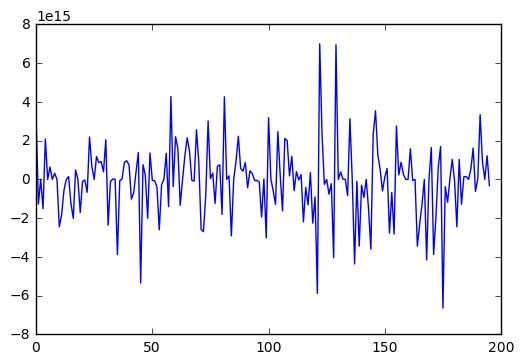

In [560]:
from sklearn import linear_model
import matplotlib.pyplot as plt


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(X_train, train_prices_array)

print 'Rsquared on train: ', result_lr.score(X_train, train_prices_array)
print 'Rsquared on validation: ', result_lr.score(X_valid, valid_prices_array)

prices_estimation = result_lr.predict(X_valid)

residuals = prices_estimation - valid_prices_array

plt.plot(residuals)
plt.show()

In [196]:
# Now with tensorflow

import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

pickle_file = 'housingNantesAllInfo.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_prices_labels = save['train_prices_labels']
  train_nbRooms_labels = save['train_nbRooms_labels']
  train_surfaceHouse_labels = save['train_surfaceHouse_labels']
  train_surfaceLand_labels = save['train_surfaceLand_labels']
  train_nbPictures_labels = save['train_nbPictures_labels']
  valid_dataset = save['valid_dataset']
  valid_prices_labels = save['valid_prices_labels']
  valid_nbRooms_labels = save['valid_nbRooms_labels']
  valid_surfaceHouse_labels = save['valid_surfaceHouse_labels']
  valid_surfaceLand_labels = save['valid_surfaceLand_labels']
  valid_nbPictures_labels = save['valid_nbPictures_labels']



  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_prices_labels.shape,train_nbRooms_labels.shape,train_surfaceHouse_labels.shape,train_surfaceLand_labels.shape,train_nbPictures_labels.shape)
  print('Validation set', valid_dataset.shape, valid_prices_labels.shape,valid_nbRooms_labels.shape,valid_surfaceHouse_labels.shape,valid_surfaceLand_labels.shape,valid_nbPictures_labels.shape)

image_size = 56

('Training set', (457, 56, 56), (457, 1), (457, 1), (457, 1), (457, 1), (457, 1))
('Validation set', (196, 56, 56), (196, 1), (196, 1), (196, 1), (196, 1), (196, 1))


In [197]:
train_prices_labels

array([[  133500.],
       [  120000.],
       [  130000.],
       [  378000.],
       [  266586.],
       [  334376.],
       [       0.],
       [   99000.],
       [  219419.],
       [  146399.],
       [   66311.],
       [  133750.],
       [  272200.],
       [  108000.],
       [  339040.],
       [  306000.],
       [  268250.],
       [  117000.],
       [  784000.],
       [  182160.],
       [  242000.],
       [  186500.],
       [  168000.],
       [  283400.],
       [  234640.],
       [  156000.],
       [  102000.],
       [  116080.],
       [  309384.],
       [  182500.],
       [  354000.],
       [  147000.],
       [  155000.],
       [  144000.],
       [  114500.],
       [  175000.],
       [  278850.],
       [  250755.],
       [  395000.],
       [  113000.],
       [  182000.],
       [  525000.],
       [  287400.],
       [  126750.],
       [  187182.],
       [   90990.],
       [  120000.],
       [ 1285000.],
       [  150560.],
       [  250336.],


In [9]:
# clean prices == 0

price_equals_zero_list = []

for i,price in enumerate(train_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = train_prices_labels.shape[0]-len(price_equals_zero_list)

train_labels_prices_no_zeros = np.zeros((new_dim, 1))

train_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
train_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

train_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_prices_labels):
    if price != 0:
        train_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(train_dataset):
    if i not in price_equals_zero_list:
        train_images_no_zeros[j,:,:] = image  
        j += 1

j = 0
for i,nbRooms in enumerate(train_nbRooms_labels):
    if i not in price_equals_zero_list:
        train_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(train_surfaceLand_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_nbPictures_labels):
    if i not in price_equals_zero_list:
        train_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1
        
# for validation:

price_equals_zero_list = []

for i,price in enumerate(valid_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = valid_prices_labels.shape[0]-len(price_equals_zero_list) 

valid_labels_prices_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

valid_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(valid_prices_labels):
    if price != 0:
        valid_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(valid_dataset):
    if i not in price_equals_zero_list:
        valid_images_no_zeros[j,:,:] = image  
        j += 1    

j = 0        
for i,nbRooms in enumerate(valid_nbRooms_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(valid_surfaceLand_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(valid_nbPictures_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1

12
5


In [10]:
train_labels_prices_no_zeros

array([[  118340.],
       [  287000.],
       [  234640.],
       [  170000.],
       [  171842.],
       [  108000.],
       [  197980.],
       [   80000.],
       [  174000.],
       [  117360.],
       [   70540.],
       [   77990.],
       [  705000.],
       [  171600.],
       [  385325.],
       [  395000.],
       [  448600.],
       [  148000.],
       [  153000.],
       [  366941.],
       [  450000.],
       [  102800.],
       [  129990.],
       [  138000.],
       [ 1184000.],
       [  117000.],
       [  218000.],
       [  249740.],
       [  250000.],
       [  178500.],
       [  132000.],
       [  598000.],
       [  266540.],
       [  127990.],
       [  142000.],
       [  219419.],
       [  993059.],
       [  135000.],
       [   48000.],
       [  207300.],
       [  384900.],
       [  333547.],
       [  182000.],
       [   97000.],
       [  268250.],
       [  243000.],
       [  417700.],
       [  118340.],
       [  114500.],
       [  201500.],


In [91]:


train_prices_labels = train_labels_prices_no_zeros / max(train_labels_prices_no_zeros)

train_nbRooms_labels = train_labels_nbRooms_no_zeros
train_surfaceHouse_labels = train_labels_surfaceHouse_no_zeros
train_surfaceLand_labels = train_labels_surfaceLand_no_zeros
train_nbPictures_labels = train_labels_nbPictures_no_zeros


valid_prices_labels = valid_labels_prices_no_zeros / max(train_labels_prices_no_zeros)

valid_nbRooms_labels = valid_labels_nbRooms_no_zeros
valid_surfaceHouse_labels = valid_labels_surfaceHouse_no_zeros
valid_surfaceLand_labels = valid_labels_surfaceLand_no_zeros
valid_nbPictures_labels = valid_labels_nbPictures_no_zeros



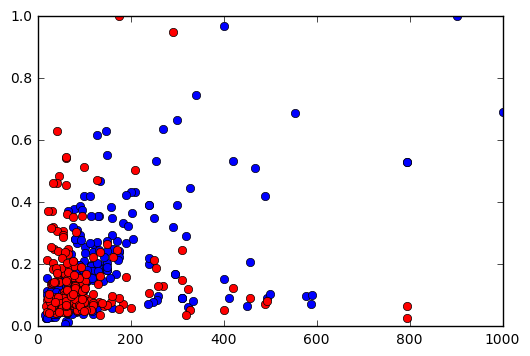

In [92]:
import matplotlib.pyplot as plt


x = train_surfaceHouse_labels
y = train_prices_labels
plt.plot(x, y, 'bo')

x = valid_surfaceHouse_labels
y = valid_prices_labels
plt.plot(x, y, 'bo',color="red")
plt.show()


In [93]:
col1 = valid_prices_labels
col2 =valid_predictions

tab_result_valid = np.zeros((valid_prices_labels.shape[0],2))

for i in range(valid_prices_labels.shape[0]):
    tab_result_valid[i][0] = valid_prices_labels[i]
    tab_result_valid[i][1] = valid_predictions[i]
    
print tab_result_valid

[[ 0.07311828  0.11912903]
 [ 0.09064516  0.16352838]
 [ 0.06666452  0.19871278]
 [ 0.3630914   0.13085717]
 [ 0.11209677  0.12583083]
 [ 0.05247312  0.35383409]
 [ 0.08575269  0.1619367 ]
 [ 0.05075269  0.14958027]
 [ 0.24510753  0.22216904]
 [ 0.03548387  0.19117327]
 [ 0.19462366  0.1447885 ]
 [ 0.4717086   0.18614693]
 [ 0.06983871  0.13839665]
 [ 0.06451613  0.11602944]
 [ 0.14655914  0.16436611]
 [ 0.35322581  0.14258528]
 [ 0.13010753  0.30486915]
 [ 0.07204301  0.16269065]
 [ 0.21492204  0.09567276]
 [ 0.1655914   0.1149404 ]
 [ 0.17526882  0.11371732]
 [ 0.08596774  0.14174756]
 [ 0.06532258  0.74490869]
 [ 0.13548387  0.18698464]
 [ 0.18763441  0.13169485]
 [ 0.07634409  0.14258528]
 [ 0.09453387  0.14509845]
 [ 0.07229839  0.23305945]
 [ 0.08387097  0.15682659]
 [ 0.0983871   0.15448934]
 [ 0.05967742  0.24730076]
 [ 0.25053763  0.13337031]
 [ 0.05644086  0.12080449]
 [ 0.17210376  0.12331763]
 [ 0.21434839  0.28834921]
 [ 0.10645161  0.12918171]
 [ 0.05322581  0.16101521]
 

In [94]:
# reformat 
train_images = train_images_no_zeros.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = valid_images_no_zeros.reshape((-1, image_size * image_size)).astype(np.float32)


nb_variables = 1
image_size = 56
num_labels= 1

dtype = np.float32

train_info = np.zeros((train_images.shape[0],nb_variables))
surface_max = max(train_surfaceHouse_labels)

for i in range(train_images.shape[0]):
    #train_info[i][0] = train_nbRooms_labels[i]
    train_info[i][0] = ( train_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
    #train_info[i][2] = train_surfaceLand_labels[i]
    #train_info[i][3] = train_nbPictures_labels[i]
    
valid_info = np.zeros((valid_images.shape[0],nb_variables))

#surface_max = max(valid_surfaceHouse_labels)
for i in range(valid_images.shape[0]):
    #valid_info[i][0] = valid_nbRooms_labels[i]
    valid_info[i][0] = ( valid_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
    #valid_info[i][2] = valid_surfaceLand_labels[i]
    #valid_info[i][3] = valid_nbPictures_labels[i] 
    


In [95]:

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation into constants that are
  # attached to the graph.
    tf_train_info = tf.placeholder(dtype, shape=[None,nb_variables])
    tf_train_price = tf.placeholder(dtype, shape=[None,train_prices_labels.shape[1]])
    tf_valid_info = tf.placeholder(dtype, shape=[None,nb_variables])
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(
        tf.truncated_normal([nb_variables, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the loss as the difference between price estimated and real prices.
    
    price_estimation = tf.matmul(tf_train_info, weights) + biases
       
    loss = tf.reduce_sum(tf.square(price_estimation - tf_train_price))/train_prices_labels.shape[0]
    #loss = tf.reduce_mean(tf.abs(price_estimation - tf_train_price))
    
  # Optimizer.
  # We are going to find the minimum of this loss using AdagradOptimizer.
  #  AdagradOptimizer
    optimizer = tf.train.AdagradOptimizer(8).minimize(loss)
    #optimizer = tf.train.MomentumOptimizer(5, 0.001).minimize(loss)
  
  # Predictions for the training and validation.
    train_prediction = price_estimation
    valid_prediction = tf.matmul(tf_valid_info, weights) + biases

In [96]:
num_steps = 50001

def accuracy(prediction, price):
  return np.mean(100 - 100*np.abs((prediction - price) / price))

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions,valid_predictions,weight,bias = session.run([optimizer, loss, train_prediction,valid_prediction,weights,biases]
                                        , feed_dict={tf_train_info: train_info,tf_train_price: train_prices_labels,tf_valid_info: valid_info })
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_prices_labels))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_predictions, valid_prices_labels))
        
print weight
print bias

Initialized
Loss at step 0: 0.026478
Training accuracy: -12.1%
Validation accuracy: 12.0%
Loss at step 1000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 2000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 3000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 4000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 5000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 6000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 7000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 8000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 9000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 10000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 11000: 0.010871
Training accuracy: 34.8%
Validation accuracy: 6.2%
Loss at step 12000: 0.010871
Training a

In [57]:
train_info

array([[-0.429  ],
       [-0.38   ],
       [-0.416  ],
       [-0.424  ],
       [-0.454  ],
       [-0.407  ],
       [-0.409  ],
       [-0.468  ],
       [-0.45498],
       [-0.465  ],
       [-0.479  ],
       [-0.475  ],
       [-0.42137],
       [-0.19   ],
       [-0.044  ],
       [-0.4009 ],
       [-0.325  ],
       [-0.45846],
       [-0.44   ],
       [-0.366  ],
       [-0.326  ],
       [-0.45   ],
       [-0.444  ],
       [-0.441  ],
       [-0.23028],
       [-0.176  ],
       [-0.43945],
       [-0.4    ],
       [-0.447  ],
       [-0.43911],
       [-0.45   ],
       [-0.21   ],
       [-0.402  ],
       [-0.469  ],
       [-0.4702 ],
       [-0.422  ],
       [-0.246  ],
       [-0.45   ],
       [-0.48   ],
       [-0.412  ],
       [-0.424  ],
       [-0.365  ],
       [-0.241  ],
       [-0.472  ],
       [-0.396  ],
       [-0.43959],
       [-0.325  ],
       [-0.422  ],
       [-0.439  ],
       [-0.44   ],
       [-0.43485],
       [-0.452  ],
       [-0.3

In [56]:
train_prices_labels

array([[ 0.06362366],
       [ 0.15430108],
       [ 0.12615054],
       [ 0.09139785],
       [ 0.09238817],
       [ 0.05806452],
       [ 0.10644086],
       [ 0.04301075],
       [ 0.09354839],
       [ 0.06309677],
       [ 0.03792473],
       [ 0.04193011],
       [ 0.37903226],
       [ 0.09225806],
       [ 0.20716398],
       [ 0.21236559],
       [ 0.2411828 ],
       [ 0.07956989],
       [ 0.08225806],
       [ 0.19728011],
       [ 0.24193548],
       [ 0.05526882],
       [ 0.0698871 ],
       [ 0.07419355],
       [ 0.63655914],
       [ 0.06290323],
       [ 0.1172043 ],
       [ 0.13426882],
       [ 0.1344086 ],
       [ 0.09596774],
       [ 0.07096774],
       [ 0.32150538],
       [ 0.14330108],
       [ 0.06881183],
       [ 0.07634409],
       [ 0.1179672 ],
       [ 0.53390269],
       [ 0.07258065],
       [ 0.02580645],
       [ 0.11145161],
       [ 0.20693548],
       [ 0.17932634],
       [ 0.09784946],
       [ 0.05215054],
       [ 0.14422043],
       [ 0

In [155]:
100 - 100*np.abs((predictions - train_prices_labels) / train_prices_labels)

array([[ -5.32344040e+01],
       [ -2.29787369e+02],
       [ -3.21740805e+02],
       [ -3.84035956e+02],
       [ -3.48529790e+02],
       [ -5.21902917e+03],
       [  1.76774800e+01],
       [ -1.65832725e+04],
       [ -2.07047874e+03],
       [  3.47775142e+01],
       [ -5.98672296e+02],
       [ -1.38874112e+04],
       [ -3.75667660e+02],
       [ -8.05494318e+02],
       [ -4.01889055e+02],
       [  9.74325079e+01],
       [ -4.68017833e+02],
       [ -7.06120861e+02],
       [  2.72290441e+01],
       [ -5.59092266e+01],
       [  6.05925694e+01],
       [ -2.97332350e+01],
       [ -8.32286484e+03],
       [ -5.94324909e+02],
       [  6.80469806e+01],
       [ -9.99164957e+03],
       [ -4.42758028e+02],
       [ -2.81934762e+02],
       [ -6.41685900e+02],
       [ -3.80266246e+02],
       [ -7.05034564e+02],
       [ -4.75149197e+03],
       [ -4.58564287e+02],
       [ -4.23486845e+02],
       [ -6.71770648e+04],
       [ -3.93534858e+02],
       [ -6.44049095e+00],
 

In [857]:
np.random.shuffle(test_shuffle_image)

In [860]:
len(test_shuffle_image)

56

In [154]:
np.abs((predictions[0] - train_prices_labels[0]) / train_prices_labels[0])

array([ 1.53234404])

Rsquared on train:  0.365455647501
Rsquared on validation:  -0.318161580403
('weight', array([ 665.99042442]))
('bias', array([ 333.4071257]))


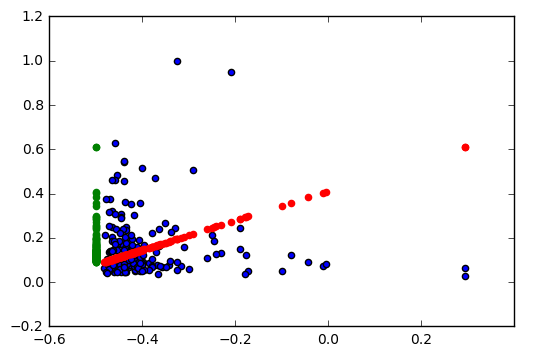

In [110]:
x = []

for i in range(valid_info.shape[0]):
    #train_info[i][0] = train_nbRooms_labels[i]
    x.append(( valid_info[i][0] - surface_max[0]  /2 ) / surface_max[0] )


from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import *

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

print 'Rsquared on train: ', result_lr.score(train_info, train_prices_labels)
print 'Rsquared on validation: ', result_lr.score(valid_info, valid_prices_labels)

prices_estimation = result_lr.predict(valid_info)


plt.scatter(valid_info, valid_prices_labels)

plt.scatter(valid_info,valid_predictions,color="r")

w,b = polyfit(x, valid_predictions, 1)

print('weight', w)
print('bias', b)

pred_w = 0.66599041
pred_b = 0.41191348

#pred_y = pred_w*train_surfaceHouse_labels + pred_b

#plt.scatter(train_surfaceHouse_labels, pred_y,color="g")


#plt.scatter(train_info,train_prices_labels,color="black")


pred_y = pred_w*valid_info + pred_b

plt.scatter(x,pred_y,color="g")


plt.show()



In [107]:
pred_y

array([[  47.69723259],
       [  80.33076268],
       [  56.35510792],
       [  51.02718464],
       [  31.04747234],
       [  62.34902161],
       [  61.01704079],
       [  21.7236066 ],
       [  30.39480174],
       [  23.72157783],
       [  14.39771209],
       [  17.06167373],
       [  52.77873942],
       [ 206.86894058],
       [ 304.10354044],
       [  66.41156311],
       [ 116.96023523],
       [  28.07715511],
       [  40.37133808],
       [  89.65462842],
       [ 116.29424482],
       [  33.71143398],
       [  37.70737644],
       [  39.70534767],
       [ 180.04284687],
       [ 216.19280632],
       [  40.73763281],
       [  67.01095448],
       [  35.70940521],
       [  40.96406954],
       [  33.71143398],
       [ 193.54913238],
       [  65.67897366],
       [  21.05761619],
       [  20.2584277 ],
       [  52.35916546],
       [ 169.57347762],
       [  33.71143398],
       [  13.73172168],
       [  59.01906956],
       [  51.02718464],
       [  90.320

In [76]:
train_surfaceHouse_labels[1][0] - surface_max[0] 

-675.0

In [90]:
valid_predictions

array([[ 0.11912903],
       [ 0.16352838],
       [ 0.19871278],
       [ 0.13085717],
       [ 0.12583083],
       [ 0.35383409],
       [ 0.1619367 ],
       [ 0.14958027],
       [ 0.22216904],
       [ 0.19117327],
       [ 0.1447885 ],
       [ 0.18614693],
       [ 0.13839665],
       [ 0.11602944],
       [ 0.16436611],
       [ 0.14258528],
       [ 0.30486915],
       [ 0.16269065],
       [ 0.09567276],
       [ 0.1149404 ],
       [ 0.11371732],
       [ 0.14174756],
       [ 0.74490869],
       [ 0.18698464],
       [ 0.13169485],
       [ 0.14258528],
       [ 0.14509845],
       [ 0.23305945],
       [ 0.15682659],
       [ 0.15448934],
       [ 0.24730076],
       [ 0.13337031],
       [ 0.12080449],
       [ 0.12331763],
       [ 0.28834921],
       [ 0.12918171],
       [ 0.16101521],
       [ 0.10790351],
       [ 0.09567276],
       [ 0.11050048],
       [ 0.11224294],
       [ 0.33861265],
       [ 0.19201098],
       [ 0.41400778],
       [ 0.11912903],
       [ 0